Download de dataset met behulp van load_iris() uit sklearn.datasets.

In [12]:
from sklearn.datasets import load_iris
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

Vul je featurematrix X op basis van de data.  
De uitkomstvector y ga je vullen op basis van target.

In [2]:
iris = load_iris()
m, n = iris.data.shape
X, y = iris.data, iris.target
X = np.c_[np.ones(m), X]

 Standaard bevat deze array de waardes 0, 1 en 2 (resp. 'setosa', 'versicolor', 'virginica').     Maak deze binair door 0 en 1 allebei 0 te maken (niet-virginica) en van elke 2 een 1 te maken (wel-virginica).   Denk erom dat y het juiste datatype en de juiste shape krijgt.

In [3]:
y_bool = np.array([0 if i <= 1 else 1 for i in y])

Definieer een functie sigmoid() die de sigmoïde-functie implementeert.

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Initialiseer een vector theta met 1.0'en in de juiste shape.  

In [5]:
theta = np.zeros((n+1, 1))
print(theta)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [6]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    #log loss cost function
    return -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

Nu kun je beginnen aan de loop waarin je in 1500 iteraties:  
De voorspellingen (denk aan sigmoid!) en de errors berekent.
De gradient berekent en theta aanpast. Werk in eerste instantie met een learning rate van 0.01.
De kosten berekent.
Als het goed is, zie je de kosten (vanaf een beginwaarde rond 8) steeds dalen kom je aan het einde rond 0,24 uit. Werk je met de niet-negatieve versie van de kostenfunctie, dan ga ja van ongeveer -8 naar -0,24.
Experimenteer eens met andere waardes van de learning rate (1.0 < alpha < 0.0) en het aantal iteraties.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[-0.38909354 -0.84919154 -0.86382937  1.34527192  1.0099789 ]


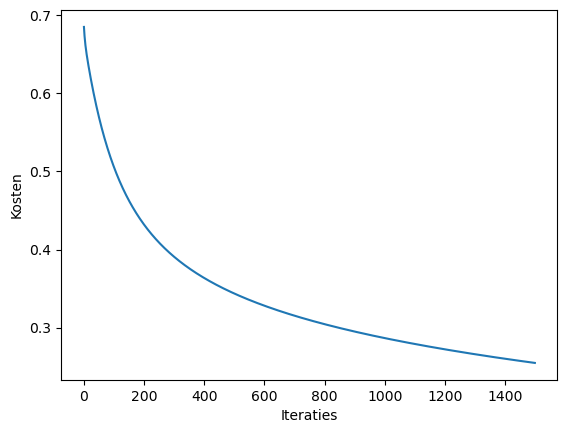

In [27]:
costs = []
alpha = 0.01
num_iters = 1500
m = len(y_bool)
theta = np.zeros(X.shape[1])

for _ in range(num_iters):
    # bereken voorspellingen mbv sigmoid functie (0/1)
    predictions = sigmoid(np.dot(X, theta)) 
    errors = predictions - y_bool
    gradient = (1/m) * np.dot(X.T, errors)
    #update theta
    theta -= alpha*gradient
    cost = compute_cost(X,y_bool, theta)
    costs.append(cost)

plt.plot(costs)
plt.xlabel('Iteraties')
plt.ylabel('Kosten')
plt.show

print(iris.feature_names)
print(theta)